# Minimum distance classifier

It is a simple classifier that is also used in many other publications to show the big picture of training with machine learning methods. There are a few terms that need to be explained here. We have divided the code into the following sections:

- data preparation,
- class centers,
- discriminant function,
- hyperplane,
- prediction.

Each section describes the next steps to build a minimum distance clasiffier.

## Data preparation

We prepared a training data set of 20 feature vectors, ten for each class. It looks like shown in cell below.

In [15]:
import numpy as np

dataset = np.matrix([[-0.95, -0.8], [-0.8, -0.3],[-0.7,0.1],[-0.5,0.2],[0.1,-0.8],[-0.3,-0.3],[-0.25,-0.7],[-0.6,-0.45],[0.25,-0.8],[0.4,-0.7],
                    [0.52,0.52],[0.7,0.53],[0.74,0.91],[0.41,0.43],[0.45,0.33],[0.97,0.05],[0.99,0.18],[0.67,0.18],[0.74,0.89],[0.06,0.49]])
labels = np.array([-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,1,1,1,1,1,1,1,1,1])

Our feature space looks as shown in Figure below. We don't need to calculate anything to see that it is a linear classification problem. We could easily draw a line between the red and blue points, but how does the classifier do it? Let's figure it out in the next steps.

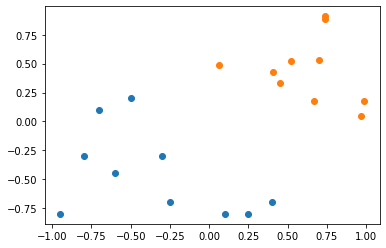

In [16]:
import matplotlib.pyplot as plt

x = np.array(dataset[0:10,0]).ravel()
y = np.array(dataset[0:10,1]).ravel()
plt.scatter(x, y)

x = np.array(dataset[10:20,0]).ravel()
y = np.array(dataset[10:20,1]).ravel()
plt.scatter(x, y)

plt.show()

## Class centers

We can implement two methods to calculate the centers of two label data sets. In the function `calculate_centers` we calculate the $m_{-1}$ and $m_{1}$ centers. We go through the feature vectors by label and calculate the average values of $x_{i1}$ and $x_{i2}$ of each class.

In [17]:
def calculate_centers():
    unique_labels = np.unique(labels)
    centers = []
    for label in unique_labels:
           centers.append(dataset[labels==label].mean(axis=0))
    return centers

In [18]:
centers = calculate_centers()

## Discriminant function

The next step is to calculate the discriminant functions for both classes. Please, keep in mind that our feature vector $x$ can be written as a matrix of two features $\begin{bmatrix}x_{1} & x_{2}\end{bmatrix}$. Discriminant functions for our example are calculated as follows:

$g_{k}(x)=2m_{k}^{T}x-m_{k}^{T}m_{k}.$

In [19]:
def calculate_discriminant_function():
    function_var_values=[]
    bias = []
    for center in centers:
        print(center[0])
        function_var_values.append(center[0]*2)
        bias.append(np.matmul(center,center.T))
    return function_var_values, bias

For now we have our two discriminant functions and centers calculated. Only the distinguishing function needs to be calculated. Let us put our results into equation:

$g(x)=2(m_{i}^{T}-m_{j}^{T})x+m_{j}^{T}m_{j}-m_{i}^{T}m_{i}.$

In [20]:
discriminant_variables, bias_variables = calculate_discriminant_function()

[[-0.335 -0.455]]
[[0.625 0.451]]


## Hyperplane

The function $g(x)$ parameters calculation can be implemented as shown in the listing below. We have only one method, called `calculate_hyperplane` in which we take the centers of both labels and calculate the parameters as shown above.

In [23]:
def calculate_hyperplane():
    hyperplane_variables = centers[0]
    for i in range(1,len(centers)):   
        hyperplane_variables=np.subtract(hyperplane_variables,centers[i])
    hyperplane_bias=np.dot(centers[len(centers)-1],centers[len(centers)-1].T)
    for i in reversed(range(0,len(centers)-1)):
        hyperplane_bias=np.subtract(hyperplane_bias, np.dot(centers[i], centers[i].T))
    return hyperplane_variables*2, hyperplane_bias

This method returns two parameters, which in the current example is $[-1.92, -1.812]$ and a bias that is $0.274776$. Later in this book, we explain the hyperplane and decision function in more detail, as both are commonly used as terms that distinguish between classes.

In [24]:
hyperplane_vars, hyperplane_bias = calculate_hyperplane()

To get the hyperplaines we need to calculate the cut points on both axis.

In [25]:
cut_points_y = [1.0,-1.0]

def get_hyperplane():    
    denominator = np.array(hyperplane_vars).ravel()[0]
    features = np.array(hyperplane_vars).ravel()[1:]
    points = []
    print(denominator)
    for cut_point_id in range(len(cut_points_y)):
        numerator = 0
        for feature in features:
            numerator = numerator + np.dot(feature,cut_points_y[cut_point_id])            
        points.append((numerator+hyperplane_bias)/-denominator)
    return points

In [26]:
cut_points_x = get_hyperplane()

-1.92


Miminum distance example with hiperplane marked with dotted line.

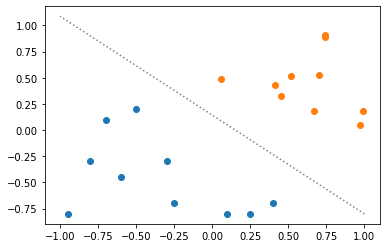

In [29]:
x = np.array(dataset[0:10,0]).ravel()
y = np.array(dataset[0:10,1]).ravel()
plt.scatter(x, y)

x = np.array(dataset[10:20,0]).ravel()
y = np.array(dataset[10:20,1]).ravel()
plt.scatter(x, y)

plt.plot(cut_points_y, np.array(cut_points_x).ravel(), linestyle = 'dotted', color="gray")

plt.show()

## Prediction

Now let's take two random feature vectors from testing data set: $x_{21}=(0.4,0.1)$ and $x_{22}=(0.1,-0.4)$. To get the prediction, we need to calculate both the discriminant function values. 

In [30]:
test_set = [[0.4, 0.1],[0.1,-0.4]]

def predict():
    prediction=[]
    unique_labels = np.unique(labels)
    for test_id in range(len(test_set)):
        best = []
        for label_id in range(len(unique_labels)):
            best.append(np.dot(discriminant_variables[label_id],np.array(test_set[test_id]))-bias_variables[label_id])
        prediction.append(unique_labels[np.argmax(best)])
    return prediction

For the first vector, we have both discriminant function values as below. For the first vector, we have both discriminant function values as follows:
\begin{equation*}
g_{-1}=-0.268-0.091-0.31925=-0.67825,
\end{equation*}
\begin{equation*}
g_{1}=0.5+0.0902−0.594026=-0.003826.
\end{equation*}
The prediction is the class where the value of the discriminant function is higher. We see that for the vector $x_{21}$ the predicted class is 1. Compare it with our second vector $x_{22}$:
\begin{equation*}
g_{-1}=-0.067+0.364-0.31925=-0.02225,
\end{equation*}
\begin{equation*}
g_{1}=0.125-0.3608−0.594026=-0.829826.
\end{equation*}
In this case, the predicted class is -1.

In [31]:
predictions = predict()
print(predictions)

[1, -1]


We can plot the feature space again, but this time including the testing set points marked with green.

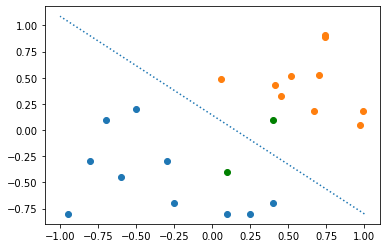

In [34]:
x = np.array(dataset[0:10,0]).ravel()
y = np.array(dataset[0:10,1]).ravel()
plt.scatter(x, y)

x = np.array(dataset[10:20,0]).ravel()
y = np.array(dataset[10:20,1]).ravel()
plt.scatter(x, y)

plt.plot(cut_points_y, np.array(cut_points_x).ravel(), linestyle = 'dotted')

x1 = 0.4
y1 = 0.1

x2 = 0.1
y2 = -0.4

plt.scatter(x1, y1, color="green")
plt.scatter(x2, y2, color="green")

plt.show()

# Quality metrics

There are several metrics to show the quality of our classification model:
- ROC which stands for Receiver Operating Characteristic curve,
- AUC -- Area Under Curve,
- $F_{1}$ score,
- Precision,
- Recall.


## Data

We use the same data set as in the MDs example from chapter 1.

In [92]:
doctor_smith = [[1,1],[-1, 1],[1, 1],[-1, -1],[1, 1],[-1, 1],[1, 1],[-1, -1],[1, -1],[-1, -1],[1,1],[-1, 1],
                [1,1],[-1, -1],[1, 1],[-1, 1],[1, -1],[-1,-1],[1,1],[-1,1]]
doctor_williamson = [[1,1],[1, 1],[1, 1],[-1, -1],[1, 1],[-1, 1],[1,1],[-1, -1],[-1,-1],[-1, -1],[1,1],
                     [1, -1],[1,1],[-1, -1],[1,1],[-1,-1],[1, 1],[-1, -1],[-1, -1],[-1, -1]]
doctor_simpson = [[1, 1],[1, 1], [1, 1],[1, 1],[1, 1],[1, 1],[1,1],[1, 1],[-1, -1],[-1,-1],[-1,-1],
                  [-1, -1],[-1,-1],[-1,-1],[-1, -1],[1, 1],[-1, -1],[-1, -1],[1, 1],[-1,-1]]    

import numpy 

smith_condition = numpy.array(doctor_smith)[:,0]
smith_diagnosis = numpy.array(doctor_smith)[:,1]

williamson_condition = numpy.array(doctor_williamson)[:,0]
williamson_diagnosis = numpy.array(doctor_williamson)[:,1]

simpson_condition = numpy.array(doctor_simpson)[:,0]
simpson_diagnosis = numpy.array(doctor_simpson)[:,1]

## Calculate the basic metrics

To calculate the metrics we should calculate the basic numbers like true positive, true negative, false positive, and false negative. After we have these, we can calculate the meaningful metrics.

In [94]:
def calculate_quality_metrics(condition, diagnosis):
    conditions_count = condition.size
    
    tp = numpy.sum(diagnosis[numpy.where(diagnosis == 1)] 
                              == condition[numpy.where(diagnosis == 1)])
    tn = numpy.sum(diagnosis[numpy.where(diagnosis == -1)] 
                              == condition[numpy.where(diagnosis == -1)])
    fp = numpy.sum(diagnosis[numpy.where(diagnosis == -1)] 
                               != condition[numpy.where(diagnosis == -1)])
    fn = numpy.sum(diagnosis[numpy.where(diagnosis == 1)] 
                               != condition[numpy.where(diagnosis == 1)])
    
    accuracy = (tp+tn)/conditions_count
    tpr = tp/(tp+fn)
    tnr = tn/(tn+fp)
    ppv = tp/(tp+fp)
    npv = tn/(tn+fn)
    fpr = 1 - tnr
    fnr = 1 - tpr
    f1_score = 2*((ppv*tpr)/(tpr+ppv))
    mcc = (tp*tn-fp*fn)/(numpy.sqrt((tp+fp)*(tp+tn)*(tn+fp)*(tn+fn)))
    
    return tp, tn, fp, fn, accuracy, tpr, tnr, ppv, npv, fpr, fnr, f1_score, mcc

Below the quality differences between the MDs are shown.

In [95]:
print("Doctor Smith: " + str(calculate_quality_metrics(smith_condition,smith_diagnosis)))
print("Doctor Williamson: " + str(calculate_quality_metrics(williamson_condition,williamson_diagnosis)))
print("Doctor Simpson: " + str(calculate_quality_metrics(simpson_condition,simpson_diagnosis)))

Doctor Smith: (8, 5, 2, 5, 0.65, 0.6153846153846154, 0.7142857142857143, 0.8, 0.5, 0.2857142857142857, 0.3846153846153846, 0.6956521739130435, 0.3144854510165755)
Doctor Williamson: (9, 9, 1, 1, 0.9, 0.9, 0.9, 0.9, 0.9, 0.09999999999999998, 0.09999999999999998, 0.9, 0.5962847939999439)
Doctor Simpson: (10, 10, 0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.7071067811865475)


## ROC and AUC

The ROC and AUC metrics are very popular charts that show the quality of the model. To plot it, we need to calculate the TPR and FPR values for different cut points.

In [118]:
def calculate_auc(condition, diagnosis):
    
    thresholds = [0.1,0.4,0.5,0.6,0.8,1.0]
    conditions_count = condition.size 
    
    tprs = [0.0]
    fprs = [0.0]
    
    for threshold in thresholds:
        thresh_cond = condition[0:int(conditions_count*threshold)]
        thresh_diag = diagnosis[0:int(conditions_count*threshold)] 
    
        tp = numpy.sum(diagnosis[numpy.where(diagnosis == 1)] 
                              == condition[numpy.where(diagnosis == 1)])
        tn = numpy.sum(diagnosis[numpy.where(diagnosis == -1)] 
                              == condition[numpy.where(diagnosis == -1)])
        fp = numpy.sum(diagnosis[numpy.where(diagnosis == -1)] 
                               != condition[numpy.where(diagnosis == -1)])
        fn = numpy.sum(diagnosis[numpy.where(diagnosis == 1)] 
                               != condition[numpy.where(diagnosis == 1)])
    
        tpr = tp/(tp+fn)  
        tnr = tn/(tn+fp)
        fpr = 1 - tnr
        tprs.append(tpr)
        fprs.append(fpr)
    tprs.append(1.0)
    fprs.append(1.0)
    auc = trapz(tprs, fprs)
    return tprs, fprs, auc

The values for Dr. Simpson looks as follows:

In [119]:
tprs, fprs, auc = calculate_auc(simpson_condition,simpson_diagnosis)

The ROC can be plot as below.

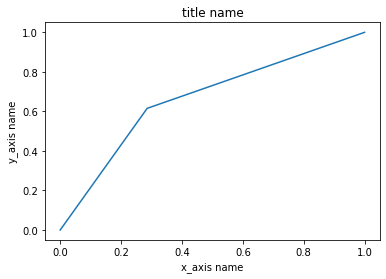

In [124]:
import matplotlib.pyplot as plt

x_axis = fprs
y_axis = tprs

plt.plot(x_axis, y_axis)
plt.title('title name')
plt.xlabel('x_axis name')
plt.ylabel('y_axis name')
plt.show()

The AUC value for Dr. Simpson is:

In [123]:
auc

0.6648351648351649